# 1: Reviewing Dataset

In [1]:
import pandas as pd
import numpy as np
import math
import operator
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sb
%matplotlib inline
sb.set()

In [2]:
App = pd.read_csv(r"googleplaystore.csv", index_col = None)
Rating = pd.read_csv(r"googleplaystore_user_reviews.csv", index_col =None)

In [3]:
App

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53M,"5,000+",Free,0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.6M,100+,Free,0,Everyone,Education,"July 6, 2018",1.0,4.1 and up
10838,Parkinson Exercices FR,MEDICAL,NaN,3,9.5M,"1,000+",Free,0,Everyone,Medical,"January 20, 2017",1.0,2.2 and up
10839,The SCP Foundation DB fr nn5n,BOOKS_AND_REFERENCE,4.5,114,Varies with device,"1,000+",Free,0,Mature 17+,Books & Reference,"January 19, 2015",Varies with device,Varies with device


# 2: Refining Data: Eliminating Irrelevant Data

In [4]:
print (f"Missing Values"+"\n" + "-"*20)

#sum of null values per column
App.isnull().sum()
df = App

Missing Values
--------------------


In [5]:
# Filter rows with null values in the 'Rating' column
rating_null_rows = df[df['Rating'].isnull()]

# Display rows with null values in the 'Rating' column
print("Rows with null values in the 'Rating' column:")
print(rating_null_rows)


Rows with null values in the 'Rating' column:
                                       App             Category  Rating  \
23                  Mcqueen Coloring pages       ART_AND_DESIGN     NaN   
113              Wrinkles and rejuvenation               BEAUTY     NaN   
123                 Manicure - nail design               BEAUTY     NaN   
126           Skin Care and Natural Beauty               BEAUTY     NaN   
129    Secrets of beauty, youth and health               BEAUTY     NaN   
...                                    ...                  ...     ...   
10824                            Cardio-FR              MEDICAL     NaN   
10825                   Naruto & Boruto FR               SOCIAL     NaN   
10831             payermonstationnement.fr  MAPS_AND_NAVIGATION     NaN   
10835                             FR Forms             BUSINESS     NaN   
10838               Parkinson Exercices FR              MEDICAL     NaN   

      Reviews  Size  Installs  Type Price Content Rat

In [6]:
# removing null values in Rating column
print(df.shape)
df.dropna(how='any',subset=["Rating"],axis=0,inplace=True)

print(df.shape)

(10841, 13)
(9367, 13)


In [7]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

In [8]:
# Filter rows with null values in the 'Sentiment_Polarity' column
sentiment_polarity_null_rows = df[df['Content Rating'].isnull()]

# Display rows with null values in the 'Sentiment_Polarity' column
print("Rows with null values in the 'Content Rating' column:")
print(sentiment_polarity_null_rows)


Rows with null values in the 'Content Rating' column:
                                           App Category  Rating Reviews  \
10472  Life Made WI-Fi Touchscreen Photo Frame      1.9    19.0    3.0M   

         Size Installs Type     Price Content Rating             Genres  \
10472  1,000+     Free    0  Everyone            NaN  February 11, 2018   

      Last Updated Current Ver Android Ver  
10472       1.0.19  4.0 and up         NaN  


In [9]:
df = df.sort_values(by="Current Ver", ascending=False)
df = df.dropna(subset=['Current Ver', 'Content Rating', 'Android Ver'])
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4120,MHD F-Series,AUTO_AND_VEHICLES,4.9,73,23M,"1,000+",Free,0,Everyone,Auto & Vehicles,"June 5, 2018",version 0.994,3.2 and up
4318,Daily K-Talk,FAMILY,4.3,264,60M,"10,000+",Free,0,Everyone,Education,"July 31, 2018",v8[1.0.10],2.3 and up
3248,"Calculator - free calculator, multi calculator...",TOOLS,4.6,25592,7.5M,"10,000,000+",Free,0,Everyone,Tools,"July 31, 2018",v8.0.1.8.0629.1,4.2 and up
3269,Sound Recorder: Recorder & Voice Changer Free,TOOLS,3.9,14552,17M,"10,000,000+",Free,0,Everyone,Tools,"July 31, 2018",v7.0.9.1.0526.1_06_0704,5.0 and up
3260,File Manager -- Take Command of Your Files Easily,TOOLS,4.2,127223,7.6M,"10,000,000+",Free,0,Everyone,Tools,"August 3, 2018",v7.0.7.1.0625.1_06_0629,5.0 and up


In [10]:
df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    0
Genres            0
Last Updated      0
Current Ver       0
Android Ver       0
dtype: int64

In [11]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4120,MHD F-Series,AUTO_AND_VEHICLES,4.9,73,23M,"1,000+",Free,0,Everyone,Auto & Vehicles,"June 5, 2018",version 0.994,3.2 and up
4318,Daily K-Talk,FAMILY,4.3,264,60M,"10,000+",Free,0,Everyone,Education,"July 31, 2018",v8[1.0.10],2.3 and up
3248,"Calculator - free calculator, multi calculator...",TOOLS,4.6,25592,7.5M,"10,000,000+",Free,0,Everyone,Tools,"July 31, 2018",v8.0.1.8.0629.1,4.2 and up
3269,Sound Recorder: Recorder & Voice Changer Free,TOOLS,3.9,14552,17M,"10,000,000+",Free,0,Everyone,Tools,"July 31, 2018",v7.0.9.1.0526.1_06_0704,5.0 and up
3260,File Manager -- Take Command of Your Files Easily,TOOLS,4.2,127223,7.6M,"10,000,000+",Free,0,Everyone,Tools,"August 3, 2018",v7.0.7.1.0625.1_06_0629,5.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6484,BM Physiotherapy Clinic,HEALTH_AND_FITNESS,5.0,3,9.3M,100+,Free,0,Everyone,Health & Fitness,"October 9, 2017",0.0.1,4.1 and up
10086,EY India Tax Insights,BUSINESS,4.7,87,5.1M,"10,000+",Free,0,Everyone,Business,"July 15, 2017",0.0.1,4.1 and up
6840,Catholic La Bu Zo Kam,BOOKS_AND_REFERENCE,5.0,23,Varies with device,500+,Free,0,Everyone,Books & Reference,"March 20, 2016",0.0.1,4.0 and up
9059,MBU DX Cluster,TOOLS,4.0,5,1.6M,500+,Free,0,Everyone,Tools,"June 16, 2015",0.0.1,2.3.3 and up


# 3: Data clean up – correcting the data types


In [12]:
# Convert 'Price' column to strings
df['Price'] = df['Price'].astype(str)

# Count the number of '$' signs in the 'Price' column
num_dollar_signs = df['Price'].str.count('$').sum()

print("Number of '$' signs in the price column:", num_dollar_signs)


Number of '$' signs in the price column: 9360


In [13]:
#  remove $ sign in Price column
df["Price"] = df["Price"].apply(lambda x:x.replace("$","") if "$" in str(x)else x)

# Converting into Float datatype
df["Price"] = df["Price"].apply(lambda x: float(x))

In [14]:
# Count how many values contain '+' or ',' in the 'Installs' column
num_modified = df['Installs'].apply(lambda x: ('+' in str(x)) or (',' in str(x))).sum()

print("Number of values in the 'Installs' column containing '+' or ',':", num_modified)

Number of values in the 'Installs' column containing '+' or ',': 9360


In [15]:
# Removing "+" & "," in Install column
df['Installs'] = df['Installs'].apply(lambda x:x.replace("+","").replace(",","").strip() if "+" in str(x) else x)
df['Installs'] = df['Installs'].apply(lambda x:int(x))

In [16]:
df['Installs'].unique()

array([      1000,      10000,   10000000,     100000,    1000000,
              100,         10,         50,    5000000,       5000,
           500000,      50000,        500, 1000000000,  100000000,
         50000000,  500000000,          5,          1], dtype=int64)

In [17]:
# Convert all other identified columns to numeric
df['Reviews'] = df['Reviews'].astype('int')

In [18]:
df['Size'] = df['Size'].apply(lambda x: str(x).replace("M","").replace(",", "").replace("+", "").strip() if "M" in str(x) else x)

# Converting kb into Mb
df['Size'] = df['Size'].apply(lambda x:float(str(x).replace('k', '')) / 1024 if 'k' in str(x) else x)


# Removing Row of 'Varies with device' in Price Column
df.drop(labels=df[df['Size'] == 'Varies with device'].index, inplace = True)

# Converting into Float
df['Size'] = df["Size"].astype(float)


In [19]:
df['Size'].dtype

dtype('float64')

In [20]:
df['Size'].unique()

array([2.30000000e+01, 6.00000000e+01, 7.50000000e+00, 1.70000000e+01,
       7.60000000e+00, 1.50000000e+01, 7.80000000e+00, 2.10000000e+01,
       2.30000000e+00, 2.20000000e+01, 1.40000000e+01, 1.80000000e+01,
       2.10000000e+00, 5.90000000e+00, 1.10000000e+01, 1.20000000e+01,
       6.70000000e+00, 1.20000000e+00, 3.30000000e+00, 1.90000000e+01,
       8.60000000e+00, 1.80000000e+00, 7.90000000e+00, 7.20000000e+00,
       8.30000000e+00, 3.90000000e+00, 3.60000000e+00, 2.70000000e+01,
       9.70000000e+00, 9.60000000e+00, 2.50000000e+00, 5.50000000e+00,
       2.00000000e+01, 1.30000000e+00, 2.14843750e-01, 5.20000000e+00,
       7.00000000e+00, 5.40000000e+00, 1.50000000e+00, 6.20000000e+00,
       4.26757812e-01, 2.60000000e+00, 5.90000000e+01, 2.40000000e+01,
       1.60000000e+01, 5.30000000e+01, 3.60000000e+01, 6.90000000e+00,
       1.30000000e+01, 3.80000000e+01, 4.40000000e+00, 5.60000000e+01,
       6.70000000e+01, 1.00000000e+01, 4.60000000e+01, 3.70000000e+01,
      

In [21]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4120,MHD F-Series,AUTO_AND_VEHICLES,4.9,73,23.0,1000,Free,0.0,Everyone,Auto & Vehicles,"June 5, 2018",version 0.994,3.2 and up
4318,Daily K-Talk,FAMILY,4.3,264,60.0,10000,Free,0.0,Everyone,Education,"July 31, 2018",v8[1.0.10],2.3 and up
3248,"Calculator - free calculator, multi calculator...",TOOLS,4.6,25592,7.5,10000000,Free,0.0,Everyone,Tools,"July 31, 2018",v8.0.1.8.0629.1,4.2 and up
3269,Sound Recorder: Recorder & Voice Changer Free,TOOLS,3.9,14552,17.0,10000000,Free,0.0,Everyone,Tools,"July 31, 2018",v7.0.9.1.0526.1_06_0704,5.0 and up
3260,File Manager -- Take Command of Your Files Easily,TOOLS,4.2,127223,7.6,10000000,Free,0.0,Everyone,Tools,"August 3, 2018",v7.0.7.1.0625.1_06_0629,5.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2534,Homeopathic Medicine Finder,MEDICAL,3.6,10,15.0,1000,Free,0.0,Everyone,Medical,"November 20, 2017",0.0.1,4.0 and up
6484,BM Physiotherapy Clinic,HEALTH_AND_FITNESS,5.0,3,9.3,100,Free,0.0,Everyone,Health & Fitness,"October 9, 2017",0.0.1,4.1 and up
10086,EY India Tax Insights,BUSINESS,4.7,87,5.1,10000,Free,0.0,Everyone,Business,"July 15, 2017",0.0.1,4.1 and up
9059,MBU DX Cluster,TOOLS,4.0,5,1.6,500,Free,0.0,Everyone,Tools,"June 16, 2015",0.0.1,2.3.3 and up


# 4: Data Integrity Verificaiton

In [22]:
# Check for abnormalities in the 'Rating' column
abnormal_ratings = df[(df['Rating'] < 1) | (df['Rating'] > 5)]

# Output the abnormal ratings for review
print("Abnormal ratings:")
print(abnormal_ratings)



Abnormal ratings:
Empty DataFrame
Columns: [App, Category, Rating, Reviews, Size, Installs, Type, Price, Content Rating, Genres, Last Updated, Current Ver, Android Ver]
Index: []


In [23]:
# Output the cleaned DataFrame without the abnormal ratings
duplicates = df.duplicated(keep=False)
duplicates_rows = df[duplicates]
print("Duplicates DataFrame:")
print(duplicates_rows)

Duplicates DataFrame:
                                             App          Category  Rating  \
3108                KAYAK Flights, Hotels & Cars  TRAVEL_AND_LOCAL     4.5   
930                             IMDb Movies & TV     ENTERTAINMENT     4.2   
888                             IMDb Movies & TV     ENTERTAINMENT     4.2   
3187                KAYAK Flights, Hotels & Cars  TRAVEL_AND_LOCAL     4.5   
3205                KAYAK Flights, Hotels & Cars  TRAVEL_AND_LOCAL     4.5   
...                                          ...               ...     ...   
588                           Adult Dirty Emojis            DATING     2.8   
528                           Adult Dirty Emojis            DATING     2.8   
608               Chat Kids - Chat Room For Kids            DATING     4.7   
10049  Airway Ex - Intubate. Anesthetize. Train.           MEDICAL     4.3   
2519   Airway Ex - Intubate. Anesthetize. Train.           MEDICAL     4.3   

       Reviews  Size   Installs  Type  Pr

In [24]:
df = df.drop_duplicates()

In [25]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4120,MHD F-Series,AUTO_AND_VEHICLES,4.9,73,23.0,1000,Free,0.0,Everyone,Auto & Vehicles,"June 5, 2018",version 0.994,3.2 and up
4318,Daily K-Talk,FAMILY,4.3,264,60.0,10000,Free,0.0,Everyone,Education,"July 31, 2018",v8[1.0.10],2.3 and up
3248,"Calculator - free calculator, multi calculator...",TOOLS,4.6,25592,7.5,10000000,Free,0.0,Everyone,Tools,"July 31, 2018",v8.0.1.8.0629.1,4.2 and up
3269,Sound Recorder: Recorder & Voice Changer Free,TOOLS,3.9,14552,17.0,10000000,Free,0.0,Everyone,Tools,"July 31, 2018",v7.0.9.1.0526.1_06_0704,5.0 and up
3260,File Manager -- Take Command of Your Files Easily,TOOLS,4.2,127223,7.6,10000000,Free,0.0,Everyone,Tools,"August 3, 2018",v7.0.7.1.0625.1_06_0629,5.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2534,Homeopathic Medicine Finder,MEDICAL,3.6,10,15.0,1000,Free,0.0,Everyone,Medical,"November 20, 2017",0.0.1,4.0 and up
6484,BM Physiotherapy Clinic,HEALTH_AND_FITNESS,5.0,3,9.3,100,Free,0.0,Everyone,Health & Fitness,"October 9, 2017",0.0.1,4.1 and up
10086,EY India Tax Insights,BUSINESS,4.7,87,5.1,10000,Free,0.0,Everyone,Business,"July 15, 2017",0.0.1,4.1 and up
9059,MBU DX Cluster,TOOLS,4.0,5,1.6,500,Free,0.0,Everyone,Tools,"June 16, 2015",0.0.1,2.3.3 and up


In [26]:
# Check for records where the number of rating is greater than the number of installs
df.loc[df['Rating'] > df['Installs']]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25.0,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
5917,Ra Ga Ba,GAME,5.0,2,20.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
10697,Mu.F.O.,GAME,5.0,2,16.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up


In [27]:
# Check for records where the number of reviews is greater than the number of installs
df.loc[df['Reviews'] > df['Installs']]


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
2454,KBA-EZ Health Guide,MEDICAL,5.0,4,25.0,1,Free,0.00,Everyone,Medical,"August 2, 2018",1.0.72,4.0.3 and up
5917,Ra Ga Ba,GAME,5.0,2,20.0,1,Paid,1.49,Everyone,Arcade,"February 8, 2017",1.0.4,2.3 and up
6700,Brick Breaker BR,GAME,5.0,7,19.0,5,Free,0.00,Everyone,Arcade,"July 23, 2018",1.0,4.1 and up
10697,Mu.F.O.,GAME,5.0,2,16.0,1,Paid,0.99,Everyone,Arcade,"March 3, 2017",1.0,2.3 and up
8591,DN Blog,SOCIAL,5.0,20,4.2,10,Free,0.00,Teen,Social,"July 23, 2018",1.0,4.0 and up
7402,Trovami se ci riesci,GAME,5.0,11,6.1,10,Free,0.00,Everyone,Arcade,"March 11, 2017",0.1,2.3 and up


In [28]:
df = df.loc[~(df['Reviews'] > df['Installs'])]

In [29]:
cleaned_df = df

In [30]:
cleaned_df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4120,MHD F-Series,AUTO_AND_VEHICLES,4.9,73,23.0,1000,Free,0.0,Everyone,Auto & Vehicles,"June 5, 2018",version 0.994,3.2 and up
4318,Daily K-Talk,FAMILY,4.3,264,60.0,10000,Free,0.0,Everyone,Education,"July 31, 2018",v8[1.0.10],2.3 and up
3248,"Calculator - free calculator, multi calculator...",TOOLS,4.6,25592,7.5,10000000,Free,0.0,Everyone,Tools,"July 31, 2018",v8.0.1.8.0629.1,4.2 and up
3269,Sound Recorder: Recorder & Voice Changer Free,TOOLS,3.9,14552,17.0,10000000,Free,0.0,Everyone,Tools,"July 31, 2018",v7.0.9.1.0526.1_06_0704,5.0 and up
3260,File Manager -- Take Command of Your Files Easily,TOOLS,4.2,127223,7.6,10000000,Free,0.0,Everyone,Tools,"August 3, 2018",v7.0.7.1.0625.1_06_0629,5.0 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2534,Homeopathic Medicine Finder,MEDICAL,3.6,10,15.0,1000,Free,0.0,Everyone,Medical,"November 20, 2017",0.0.1,4.0 and up
6484,BM Physiotherapy Clinic,HEALTH_AND_FITNESS,5.0,3,9.3,100,Free,0.0,Everyone,Health & Fitness,"October 9, 2017",0.0.1,4.1 and up
10086,EY India Tax Insights,BUSINESS,4.7,87,5.1,10000,Free,0.0,Everyone,Business,"July 15, 2017",0.0.1,4.1 and up
9059,MBU DX Cluster,TOOLS,4.0,5,1.6,500,Free,0.0,Everyone,Tools,"June 16, 2015",0.0.1,2.3.3 and up


In [31]:
import pandas as pd

# Assuming 'df' is your DataFrame
# Grouping by 'Category' and describing 'Installs'
category_installs_stats = cleaned_df.groupby('App')['Rating'].describe()

# Resetting index to show 'Category' as a column
category_installs_stats = category_installs_stats.reset_index()

print(category_installs_stats)

                                                   App  count  mean  std  min  \
0                        +Download 4 Instagram Twitter    1.0   4.5  NaN  4.5   
1                           - Free Comics - Comic Apps    1.0   3.5  NaN  3.5   
2                                                   .R    1.0   4.5  NaN  4.5   
3                                               /u/app    1.0   4.7  NaN  4.7   
4                                               058.ba    1.0   4.4  NaN  4.4   
...                                                ...    ...   ...  ...  ...   
7012                                       감성학원 BL 첫사랑    1.0   4.4  NaN  4.4   
7013                                        💎 I'm rich    1.0   3.8  NaN  3.8   
7014     💘 WhatsLov: Smileys of love, stickers and GIF    1.0   4.6  NaN  4.6   
7015  📏 Smart Ruler ↔️ cm/inch measuring for homework!    1.0   4.0  NaN  4.0   
7016  🔥 Football Wallpapers 4K | Full HD Backgrounds 😍    1.0   4.7  NaN  4.7   

      25%  50%  75%  max  


In [32]:
import pandas as pd

# Assuming 'df' is your DataFrame
# Grouping by 'App' and describing 'Size'
app_size_stats = df.groupby('App')['Rating'].describe()

# Resetting index to show 'App' as a column
app_size_stats = app_size_stats.reset_index()

# Filtering to include only duplicate apps
duplicate_apps = app_size_stats[app_size_stats['count'] > 1]

print(duplicate_apps)


                                                    App  count  mean  std  \
43                              365Scores - Live Scores    2.0   4.6  0.0   
79                                          8 Ball Pool    7.0   4.5  0.0   
81                      95Live -SG#1 Live Streaming App    2.0   4.1  0.0   
89                A&E - Watch Full Episodes of TV Shows    2.0   4.0  0.0   
113                       AC - Tips & News for Android™    2.0   4.2  0.0   
...                                                 ...    ...   ...  ...   
6951                            osmino Wi-Fi: free WiFi    2.0   4.2  0.0   
6963                     stranger chat - anonymous chat    2.0   3.5  0.0   
6968                        textPlus: Free Text & Calls    2.0   4.1  0.0   
6973  theScore: Live Sports Scores, News, Stats & Vi...    2.0   4.4  0.0   
6989                     wetter.com - Weather and Radar    2.0   4.2  0.0   

      min  25%  50%  75%  max  
43    4.6  4.6  4.6  4.6  4.6  
79    4.5  

In [33]:
import pandas as pd

# Assuming 'df' is your DataFrame
# Remove rows with duplicate 'App' names
cleaned_df_unique = cleaned_df.drop_duplicates(subset='App', keep='first')

# Grouping by 'App' and counting occurrences
app_counts = cleaned_df['App'].value_counts()

# Getting a list of apps with more than one occurrence
duplicate_app_names = app_counts[app_counts > 1].index.tolist()

# Adding back one row for each duplicate 'App' name
for app_name in duplicate_app_names:
    duplicate_rows = cleaned_df[cleaned_df['App'] == app_name]
    cleaned_df_unique = pd.concat([cleaned_df_unique, duplicate_rows.head(1)])

# Sorting by index to maintain the original order
cleaned_df_unique = cleaned_df_unique.sort_index()

cleaned_df_unique


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.700000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,0.604492,1000,Free,0.0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.600000,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.600000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


In [34]:
df = cleaned_df_unique

In [35]:
#Merge stateInfo and stateHistory 
final_df = df
new_df = pd.merge(final_df, Rating, on = 'App')

new_df = new_df.sort_values(by="Sentiment_Polarity", ascending=False)
new_df = new_df.dropna(subset=['Sentiment_Polarity'])

In [36]:
# Remove duplicate rows
new_df.drop_duplicates(inplace=True)

# Create a new DataFrame without duplicates
new_df_without_duplicates = new_df.drop_duplicates()

In [37]:
import pandas as pd

# Assuming 'df' is your DataFrame and 'Sentiment' is the column containing sentiment values
# Map sentiment values to numerical values
sentiment_mapping = {'Positive': 1, 'Negative': -1, 'Neutral': 0}
new_df['Sentiment'] = new_df['Sentiment'].replace(sentiment_mapping)


# Display the DataFrame with the updated sentiment values
print(new_df)


                       App          Category  Rating  Reviews  Size  \
24390          Crossy Road              GAME     4.5  4230886  60.0   
26713     Garena Free Fire              GAME     4.5  5476569  53.0   
39546           DreamTrips  TRAVEL_AND_LOCAL     4.7     9971  22.0   
39545           DreamTrips  TRAVEL_AND_LOCAL     4.7     9971  22.0   
1236    Filters for Selfie            BEAUTY     4.3     8572  25.0   
...                    ...               ...     ...      ...   ...   
49844   Anthem BC Anywhere           MEDICAL     2.6      496  24.0   
49821   Anthem BC Anywhere           MEDICAL     2.6      496  24.0   
20472        Cooking Fever              GAME     4.5  3197865  82.0   
42555  Archos File Manager      PRODUCTIVITY     4.0     2131   2.3   
33278          ConnectLine           MEDICAL     3.1      253   4.2   

        Installs  Type  Price Content Rating          Genres  \
24390  100000000  Free    0.0       Everyone          Action   
26713  100000000  F

In [38]:
import pandas as pd

# Assuming 'df' is your DataFrame
# Grouping by 'App' and describing 'Rating'
app_rating_stats = new_df.groupby('App')['Sentiment'].describe()

# Resetting index to show 'App' as a column
app_rating_stats = app_rating_stats.reset_index()

print(app_rating_stats)


                                                   App  count      mean  \
0                                10 Best Foods for You   95.0  0.778947   
1                                                 11st   40.0  0.400000   
2                           1800 Contacts - Lens Store   40.0  0.725000   
3                      1LINE – One Line with One Touch   38.0  0.500000   
4                         21-Day Meditation Experience   41.0  0.731707   
..                                                 ...    ...       ...   
564  Horoscopes – Daily Zodiac Horoscope and Astrology   35.0  0.571429   
565                              Horses Live Wallpaper   33.0  0.606061   
566     Hostelworld: Hostels & Cheap Hotels Travel App   38.0  0.526316   
567                      Hotels Combined - Cheap deals   36.0  0.222222   
568     Hotspot Shield Free VPN Proxy & Wi-Fi Security   32.0  0.375000   

          std  min  25%  50%  75%  max  
0    0.529531 -1.0  1.0  1.0  1.0  1.0  
1    0.777900 -1.

In [39]:
# List of columns to drop
columns_to_drop = ['std', 'min', '25%', '50%', '75%', 'max']
# Assuming these are the column names based on your question

# Drop the columns
app_rating_stats.drop(columns=columns_to_drop, inplace=True)

# Now app_rating_stats DataFrame will not contain the specified columns
# Assuming 'mean' column represents the mean rating and you want to replace it with sentiment mean

# Rename the 'mean' column to 'sentiment_mean'
app_rating_stats.rename(columns={'mean': 'Sentiment'}, inplace=True)

# Now 'mean' column is replaced with 'sentiment_mean'


In [40]:
# Merge app_rating_stats with cleaned_df_unique based on the 'App' column
app_rating_stats = app_rating_stats.merge(cleaned_df_unique[['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type', 'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver', 'Android Ver']], on='App', how='left', suffixes=('_stats', '_cleaned'))


In [41]:
app_rating_stats

,App,count,Sentiment,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,10 Best Foods for You,95.0,0.778947,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,Free,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
1,11st,40.0,0.400000,SHOPPING,3.8,48732,20.0,10000000,Free,0.0,Everyone,Shopping,"July 31, 2018",7.8.1,4.0 and up
2,1800 Contacts - Lens Store,40.0,0.725000,MEDICAL,4.7,23160,26.0,1000000,Free,0.0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
3,1LINE – One Line with One Touch,38.0,0.500000,GAME,4.6,214878,10.0,10000000,Free,0.0,Everyone,Board,"August 3, 2018",2.0.4,4.1 and up
4,21-Day Meditation Experience,41.0,0.731707,HEALTH_AND_FITNESS,4.4,11506,15.0,100000,Free,0.0,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,Horoscopes – Daily Zodiac Horoscope and Astrology,35.0,0.571429,LIFESTYLE,4.6,161143,11.0,10000000,Free,0.0,Everyone 10+,Lifestyle,"June 25, 2018",5.2.4(881),4.0.3 and up
669,Horses Live Wallpaper,33.0,0.606061,PERSONALIZATION,4.2,28806,7.1,1000000,Free,0.0,Everyone,Personalization,"May 22, 2018",18.0,4.1 and up
670,Hostelworld: Hostels & Cheap Hotels Travel App,38.0,0.526316,TRAVEL_AND_LOCAL,4.4,17878,28.0,1000000,Free,0.0,Everyone,Travel & Local,"July 16, 2018",6.7.1,4.1 and up
671,Hotels Combined - Cheap deals,36.0,0.222222,TRAVEL_AND_LOCAL,4.1,17202,12.0,5000000,Free,0.0,Everyone,Travel & Local,"November 13, 2017",4.9.2,4.1 and up


In [42]:
df = app_rating_stats

In [43]:
# List of values to remove
values_to_remove = [100, 500, 100000000, 50000000, 10, 50, 500000000, 1000000000, 5, 5000, 50000, 5000000, 1000, 10000000, 500000]

# Filter out rows with 'Installs' column not in values_to_remove
filtered_df = df[~df['Installs'].isin(values_to_remove)]

# Print the filtered DataFrame
print(filtered_df)

# List of values to remove
values_to_remove1 = [100, 500, 100000000, 50000000, 10, 50, 500000000, 1000000000, 5, 5000, 50000, 100000, 1000000, 100000, 10000, 500000]

# Filter out rows with 'Installs' column not in values_to_remove
filtered_df1 = df[~df['Installs'].isin(values_to_remove1)]


# List of values to remove
values_to_remove2 = [100, 500, 100000000, 50000000, 10, 50, 500000000, 1000000000, 5, 5000, 50000, 100000]

# Filter out rows with 'Installs' column not in values_to_remove
filtered_df2 = df[~df['Installs'].isin(values_to_remove2)]

filtered_df3 = app_rating_stats

                                                App  count  Sentiment  \
2                        1800 Contacts - Lens Store   40.0   0.725000   
4                      21-Day Meditation Experience   41.0   0.731707   
6                                         2RedBeans   36.0   0.722222   
7                     2ndLine - Second Phone Number   40.0   0.250000   
10                       3D Live Neon Weed Launcher    2.0   1.000000   
..                                              ...    ...        ...   
663                      Homes.com 🏠 For Sale, Rent   20.0   0.350000   
666                                Homework Planner   37.0   0.783784   
667                               Honkai Impact 3rd   38.0   0.421053   
669                           Horses Live Wallpaper   33.0   0.606061   
670  Hostelworld: Hostels & Cheap Hotels Travel App   38.0   0.526316   

               Category  Rating  Reviews  Size  Installs  Type  Price  \
2               MEDICAL     4.7    23160  26.0   1

In [44]:
# List of values to remove
values_to_remove2 = [100, 500, 100000000, 50000000, 10, 50, 500000000, 1000000000, 5, 5000, 50000, 100000]

# Filter out rows with 'Installs' column not in values_to_remove
dff2 = cleaned_df_unique[~cleaned_df_unique['Installs'].isin(values_to_remove2)]

# List of values to remove
values_to_remove = [100, 500, 100000000, 50000000, 10, 50, 500000000, 1000000000, 5, 5000, 50000, 5000000, 1000, 10000000, 500000]

# Filter out rows with 'Installs' column not in values_to_remove
dff = cleaned_df_unique[~cleaned_df_unique['Installs'].isin(values_to_remove)]

In [45]:
# Assuming 'Installs' is a column in your DataFrame df
install_counts = cleaned_df_unique['Installs'].value_counts()

# Print the counts of each unique value in the 'Installs' column
print(install_counts)

# Assuming 'Installs' is a column in your DataFrame df
install_counts = filtered_df['Installs'].value_counts()

# Print the counts of each unique value in the 'Installs' column
print(install_counts)

# Assuming 'Installs' is a column in your DataFrame df
install_counts = filtered_df1['Installs'].value_counts()

# Print the counts of each unique value in the 'Installs' column
print(install_counts)

# Assuming 'Installs' is a column in your DataFrame df
install_counts = filtered_df2['Installs'].value_counts()

# Print the counts of each unique value in the 'Installs' column
print(install_counts)



1000000       1228
100000         999
10000          948
10000000       744
1000           674
5000000        483
500000         471
50000          430
5000           413
100            298
500            195
100000000      141
50000000       137
10              65
50              56
500000000       15
5                8
1000000000       4
Name: Installs, dtype: int64
1000000    180
100000      80
10000       17
Name: Installs, dtype: int64
10000000    146
5000000      86
1000          1
Name: Installs, dtype: int64
1000000     180
10000000    146
5000000      86
500000       65
10000        17
1000          1
Name: Installs, dtype: int64


In [46]:
filtered_df3 = df

# 5: KNN Classification

## Predicting Category 

In [47]:
df = cleaned_df_unique

In [48]:
df.dtypes

df['Content Rating'] = df['Content Rating'].astype(str)
df['Genres'] = df['Genres'].astype(str)
df['Category'] = df['Category'].astype(str)



In [49]:
# # Assuming df is your DataFrame containing the "Genres" and "Category" columns

# # Convert both columns to lowercase for case-insensitive comparison
# df['Genres'] = df['Genres'].str.lower()
# df['Category'] = df['Category'].str.lower()

# # Split the strings into lists of words
# df['Genres'] = df['Genres'].str.split(',')
# df['Category'] = df['Category'].str.split(',')

# # Function to find common words between two lists
# def count_common_words(row):
#     return len(set(row['Genres']) & set(row['Category']))

# # Apply the function row-wise and create a new column with the count of common words
# df['Common_Words_Count'] = df.apply(count_common_words, axis=1)

# # Total count of common words
# total_common_words_count = df['Common_Words_Count'].sum()

# print("Total number of common words between Genres and Category columns:", total_common_words_count)


In [50]:
# # Filter rows where common words are present
# rows_with_common_words = df[df['Common_Words_Count'] > 0]

# # Display the filtered rows
# print("Rows where common words between Genres and Category columns are present:")
# print(rows_with_common_words)


In [51]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.700000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,0.604492,1000,Free,0.0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.600000,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.600000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


In [52]:
# Importing necessary libraries
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Preprocessing: Convert category into numerical values using one-hot encoding
df = pd.get_dummies(df, columns=['Category'])
df = pd.get_dummies(df, columns=['Genres'])
df = pd.get_dummies(df, columns=['Content Rating'])

# Separate features and target variable
X = df[[col for col in df.columns if col.startswith('Content_Rating_')] + [col for col in df.columns if col.startswith('Genres_')] + ['Rating'] + ['Reviews']]
y = df[[col for col in df.columns if col.startswith('Category_')]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN classification model
k = 7  # Number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train_scaled, y_train)

# Predict
y_pred_train_KNN_Class = knn_model.predict(X_train_scaled)
y_pred_test_KNN_Class = knn_model.predict(X_test_scaled)

# Evaluate model
train_accuracy = accuracy_score(y_train, y_pred_train_KNN_Class)
test_accuracy = accuracy_score(y_test, y_pred_test_KNN_Class)

print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)

from sklearn.metrics import classification_report

# Generate classification report for the test set
classification_report_test = classification_report(y_test, y_pred_test_KNN_Class)

# Print the classification report
print("Classification Report for Test Set:")
print(classification_report_test)


Training accuracy: 0.9562168633487258
Testing accuracy: 0.9418604651162791
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        15
           2       1.00      1.00      1.00        11
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        46
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00        42
           7       1.00      1.00      1.00        27
           8       0.89      0.29      0.43        28
           9       0.78      0.41      0.54        17
          10       1.00      1.00      1.00         8
          11       0.88      0.89      0.88       308
          12       1.00      1.00      1.00        45
          13       1.00      1.00      1.00        19
          14       0.99      0.90      0.94       185
          15       1.00 

C:\Users\Ivan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [53]:
df.dtypes

App                             object
Rating                         float64
Reviews                          int32
Size                           float64
Installs                         int64
                                ...   
Content Rating_Everyone          uint8
Content Rating_Everyone 10+      uint8
Content Rating_Mature 17+        uint8
Content Rating_Teen              uint8
Content Rating_Unrated           uint8
Length: 160, dtype: object

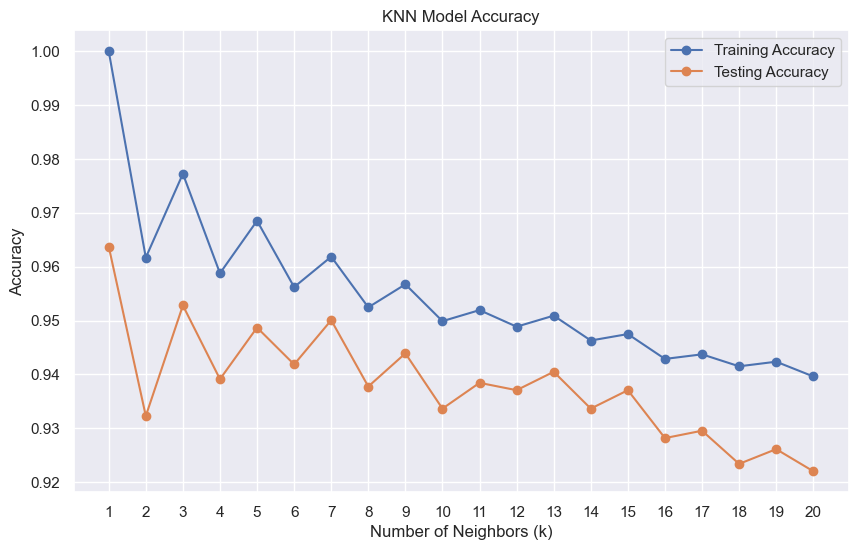

In [54]:
# import matplotlib.pyplot as plt

# Initialize lists to store accuracies
train_accuracies = []
test_accuracies = []

# Test different values of k
for k in range(1, 21):
    # Train KNN classification model
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled, y_train)

    # Predict
    y_pred_train_KNN_Class = knn_model.predict(X_train_scaled)
    y_pred_test_KNN_Class = knn_model.predict(X_test_scaled)

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_pred_train_KNN_Class)
    test_accuracy = accuracy_score(y_test, y_pred_test_KNN_Class)

    # Append accuracies to lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), train_accuracies, marker='o', label='Training Accuracy')
plt.plot(range(1, 21), test_accuracies, marker='o', label='Testing Accuracy')
plt.title('KNN Model Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(range(1, 21))
plt.legend()
plt.grid(True)
plt.show()


In [55]:
X_test

,Genres_Action,Genres_Action;Action & Adventure,Genres_Adventure,Genres_Adventure;Action & Adventure,Genres_Adventure;Brain Games,Genres_Adventure;Education,Genres_Arcade,Genres_Arcade;Action & Adventure,Genres_Arcade;Pretend Play,Genres_Art & Design,...,Genres_Travel & Local,Genres_Travel & Local;Action & Adventure,Genres_Trivia,Genres_Video Players & Editors,Genres_Video Players & Editors;Creativity,Genres_Video Players & Editors;Music & Video,Genres_Weather,Genres_Word,Rating,Reviews
9141,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.4,1690802
7690,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.2,7935
6632,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.6,26
3194,0,0,0,0,0,0,0,0,0,0,...,1,0,0,0,0,0,0,0,4.4,134895
6212,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.9,129268
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5630,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.5,9335
4535,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.4,1852
858,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,4.3,296771
6041,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,3.4,3491


# Predicting Content Rating

In [479]:
df = cleaned_df_unique

In [480]:
df

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.700000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,0.604492,1000,Free,0.0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.600000,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.600000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


In [481]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Preprocessing: Convert category into numerical values using one-hot encoding
df = pd.get_dummies(df, columns=['Category'])
df = pd.get_dummies(df, columns=['Genres'])
df = pd.get_dummies(df, columns=['Content Rating'])

# Separate features and target variable
X = df[[col for col in df.columns if col.startswith('Category_')] + 
       [col for col in df.columns if col.startswith('Genres_')] + 
       ['Rating', 'Reviews']]
y = df[[col for col in df.columns if col.startswith('Content Rating_')]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN classification model
k = 7  # Number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train_scaled, y_train)

# Predict
y_pred_train_KNN_Class = knn_model.predict(X_train_scaled)
y_pred_test_KNN_Class = knn_model.predict(X_test_scaled)

# Evaluate model
train_accuracy = accuracy_score(y_train, y_pred_train_KNN_Class)
test_accuracy = accuracy_score(y_test, y_pred_test_KNN_Class)

print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)

# Generate classification report for the test set
classification_report_test = classification_report(y_test, y_pred_test_KNN_Class)

# Print the classification report
print("Classification Report for Test Set:")
print(classification_report_test)


Training accuracy: 0.8337609030271934
Testing accuracy: 0.8036935704514364
Classification Report for Test Set:
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.90      0.93      0.92      1183
           2       0.44      0.12      0.18        60
           3       0.81      0.43      0.57        60
           4       0.50      0.25      0.33       159
           5       0.00      0.00      0.00         0

   micro avg       0.87      0.80      0.84      1462
   macro avg       0.44      0.29      0.33      1462
weighted avg       0.83      0.80      0.81      1462
 samples avg       0.80      0.80      0.80      1462



C:\Users\Ivan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ivan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ivan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


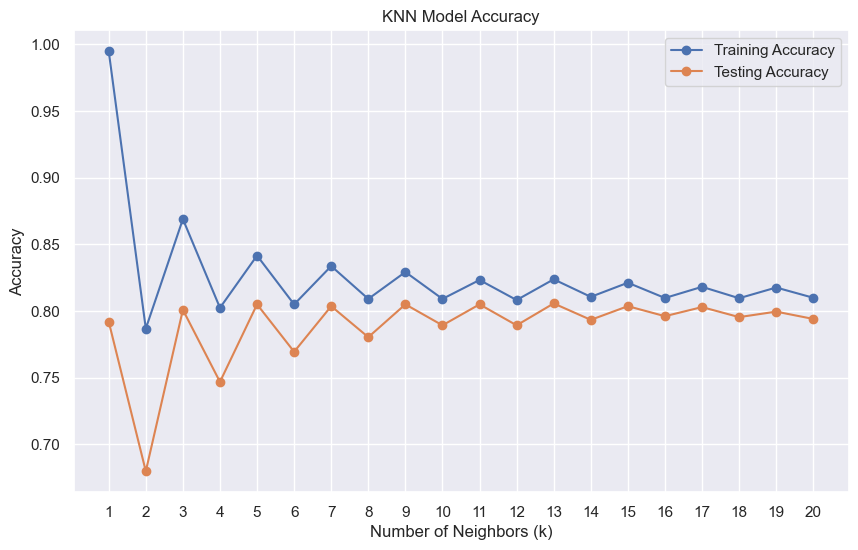

In [482]:
# import matplotlib.pyplot as plt

# Initialize lists to store accuracies
train_accuracies = []
test_accuracies = []

# Test different values of k
for k in range(1, 21):
    # Train KNN classification model
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled, y_train)

    # Predict
    y_pred_train_KNN_Class = knn_model.predict(X_train_scaled)
    y_pred_test_KNN_Class = knn_model.predict(X_test_scaled)

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_pred_train_KNN_Class)
    test_accuracy = accuracy_score(y_test, y_pred_test_KNN_Class)

    # Append accuracies to lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), train_accuracies, marker='o', label='Training Accuracy')
plt.plot(range(1, 21), test_accuracies, marker='o', label='Testing Accuracy')
plt.title('KNN Model Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(range(1, 21))
plt.legend()
plt.grid(True)
plt.show()


# Predicting Installs

In [489]:
df = dff

In [490]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

# Preprocessing: Convert category into numerical values using one-hot encoding
df = pd.get_dummies(df, columns=['Category'])
df = pd.get_dummies(df, columns=['Genres'])
df = pd.get_dummies(df, columns=['Content Rating'])

# Separate features and target variable
X = df[[col for col in df.columns if col.startswith('Category_')] + 
#        [col for col in df.columns if col.startswith('Genres_')] + 
       ['Rating', 'Reviews']]
y = df[['Installs']]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN classification model
k = 7  # Number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train_scaled, y_train)

# Predict
y_pred_train_KNN_Class = knn_model.predict(X_train_scaled)
y_pred_test_KNN_Class = knn_model.predict(X_test_scaled)

# Evaluate model
train_accuracy = accuracy_score(y_train, y_pred_train_KNN_Class)
test_accuracy = accuracy_score(y_test, y_pred_test_KNN_Class)

print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)

# Generate classification report for the test set
classification_report_test = classification_report(y_test, y_pred_test_KNN_Class)

# Print the classification report
print("Classification Report for Test Set:")
print(classification_report_test)


C:\Users\Ivan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


Training accuracy: 0.771259842519685
Testing accuracy: 0.6976377952755906
Classification Report for Test Set:
              precision    recall  f1-score   support

       10000       0.64      0.72      0.67       187
      100000       0.54      0.60      0.57       193
     1000000       0.93      0.76      0.83       255

    accuracy                           0.70       635
   macro avg       0.70      0.69      0.69       635
weighted avg       0.72      0.70      0.71       635



C:\Users\Ivan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Ivan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Ivan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
C:\Users\Ivan\anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples

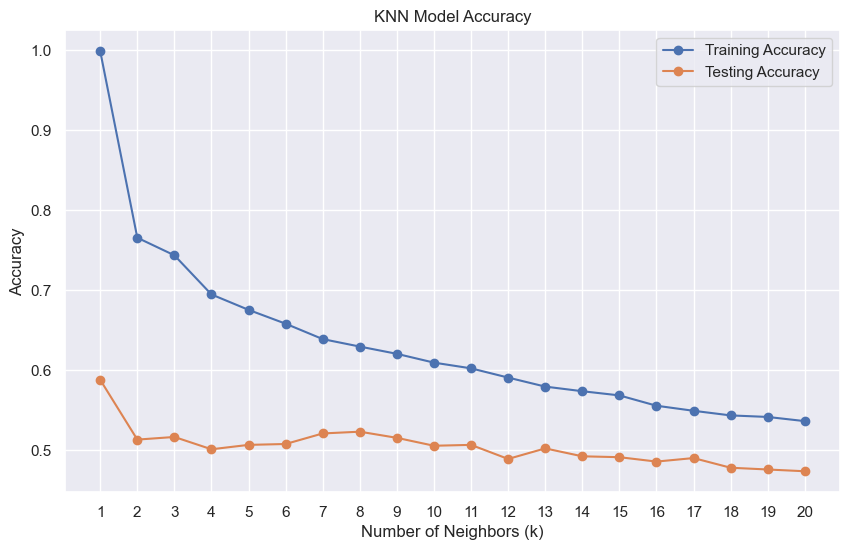

In [485]:
# import matplotlib.pyplot as plt

# Initialize lists to store accuracies
train_accuracies = []
test_accuracies = []

# Test different values of k
for k in range(1, 21):
    # Train KNN classification model
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled, y_train)

    # Predict
    y_pred_train_KNN_Class = knn_model.predict(X_train_scaled)
    y_pred_test_KNN_Class = knn_model.predict(X_test_scaled)

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_pred_train_KNN_Class)
    test_accuracy = accuracy_score(y_test, y_pred_test_KNN_Class)

    # Append accuracies to lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), train_accuracies, marker='o', label='Training Accuracy')
plt.plot(range(1, 21), test_accuracies, marker='o', label='Testing Accuracy')
plt.title('KNN Model Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(range(1, 21))
plt.legend()
plt.grid(True)
plt.show()


# Predict Price

In [486]:
df = cleaned_df_unique

In [487]:
# Importing necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score

df['Price'] = df['Price'].astype(str)


# Preprocessing: Convert category into numerical values using one-hot encoding
df = pd.get_dummies(df, columns=['Category'])
df = pd.get_dummies(df, columns=['Genres'])
# df = pd.get_dummies(df, columns=['Content Rating'])

# Separate features and target variable
X = df[[col for col in df.columns if col.startswith('Category_')] + 
       [col for col in df.columns if col.startswith('Genres_')] + ['Size' , 'Rating']]
#        ['Rating', 'Reviews']]
y = df['Price']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Train KNN classification model
k = 7  # Number of neighbors
knn_model = KNeighborsClassifier(n_neighbors=k)
knn_model.fit(X_train_scaled, y_train)

# Predict
y_pred_train_KNN_Class = knn_model.predict(X_train_scaled)
y_pred_test_KNN_Class = knn_model.predict(X_test_scaled)

# Evaluate model
train_accuracy = accuracy_score(y_train, y_pred_train_KNN_Class)
test_accuracy = accuracy_score(y_test, y_pred_test_KNN_Class)

print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)

# Generate classification report for the test set
classification_report_test = classification_report(y_test, y_pred_test_KNN_Class)

# Print the classification report
print("Classification Report for Test Set:")
print(classification_report_test)


Training accuracy: 0.926971096288695
Testing accuracy: 0.9302325581395349
Classification Report for Test Set:
              precision    recall  f1-score   support

         0.0       0.93      1.00      0.97      1361
        0.99       0.00      0.00      0.00        15
        1.49       0.00      0.00      0.00         2
        1.75       0.00      0.00      0.00         1
        1.99       0.00      0.00      0.00        13
        10.0       0.00      0.00      0.00         1
       10.99       0.00      0.00      0.00         1
       11.99       0.00      0.00      0.00         1
       12.99       0.00      0.00      0.00         1
        14.0       0.00      0.00      0.00         1
       14.99       0.00      0.00      0.00         1
       19.99       0.00      0.00      0.00         2
        2.49       0.00      0.00      0.00         5
        2.99       0.20      0.06      0.09        17
      299.99       0.00      0.00      0.00         1
        3.08       0.00  

C:\Users\Ivan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ivan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ivan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


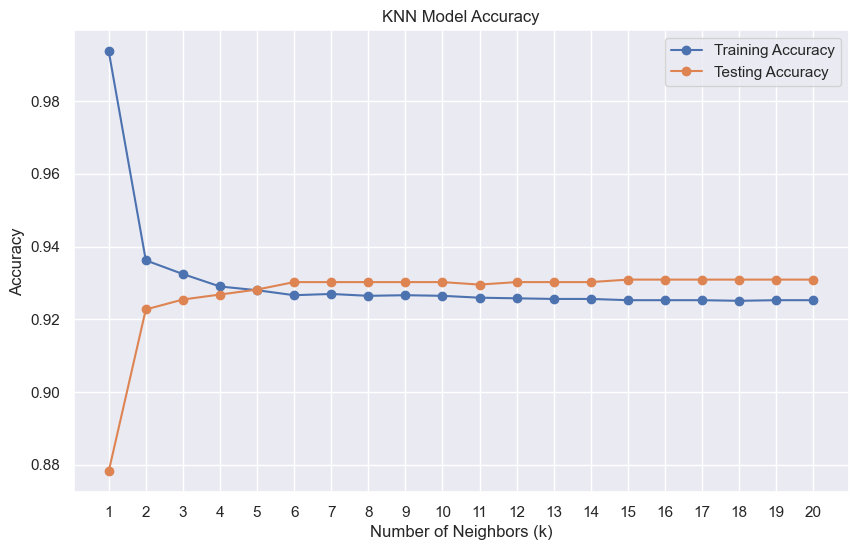

In [488]:
# import matplotlib.pyplot as plt

# Initialize lists to store accuracies
train_accuracies = []
test_accuracies = []

# Test different values of k
for k in range(1, 21):
    # Train KNN classification model
    knn_model = KNeighborsClassifier(n_neighbors=k)
    knn_model.fit(X_train_scaled, y_train)

    # Predict
    y_pred_train_KNN_Class = knn_model.predict(X_train_scaled)
    y_pred_test_KNN_Class = knn_model.predict(X_test_scaled)

    # Calculate accuracies
    train_accuracy = accuracy_score(y_train, y_pred_train_KNN_Class)
    test_accuracy = accuracy_score(y_test, y_pred_test_KNN_Class)

    # Append accuracies to lists
    train_accuracies.append(train_accuracy)
    test_accuracies.append(test_accuracy)

# Plotting
plt.figure(figsize=(10, 6))
plt.plot(range(1, 21), train_accuracies, marker='o', label='Training Accuracy')
plt.plot(range(1, 21), test_accuracies, marker='o', label='Testing Accuracy')
plt.title('KNN Model Accuracy')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Accuracy')
plt.xticks(range(1, 21))
plt.legend()
plt.grid(True)
plt.show()


# 6: Classification Model (SVM)


In [66]:
df = dff

## Predicting Installs

In [67]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV


# Preprocessing: Convert category into numerical values using one-hot encoding
df = pd.get_dummies(df, columns=['Category'])
# df= pd.get_dummies(df, columns=['Genres'])

# Separate features and target variable
# X = df[['Reviews', 'Rating'] + [col for col in df.columns if col.startswith('Category_')] + [col for col in df.columns if col.startswith('Genres_')]]
X = df[['Reviews'] + ['Rating'] + [col for col in df.columns if col.startswith('Category_')]]
y = df['Installs']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Combine features and target variable for resampling
X_combined = pd.concat([X_train, y_train], axis=1)

# Handling class imbalance
oversampler = RandomOverSampler(random_state=42)
X_combined_resampled, y_train_resampled = oversampler.fit_resample(X_combined, X_combined.iloc[:, -1])

# Split the resampled data back into features and target variable
X_train_resampled = X_combined_resampled.iloc[:, :-1]
y_train_resampled = X_combined_resampled.iloc[:, -1]

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train_resampled)
X_test_scaled = scaler.transform(X_test)

# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'], 'kernel': ['rbf']}
svm_grid = GridSearchCV(SVC(), param_grid, cv=5)
svm_grid.fit(X_train_scaled, y_train_resampled)

# Best parameters found by GridSearchCV
print("Best parameters found by GridSearchCV:", svm_grid.best_params_)

# Train SVM classification model with best parameters
best_svm_model = SVC(**svm_grid.best_params_, random_state=42)
best_svm_model.fit(X_train_scaled, y_train_resampled)

# Predict
y_pred_train_SVM = best_svm_model.predict(X_train_scaled)
y_pred_test_SVM = best_svm_model.predict(X_test_scaled)

# Evaluate model
train_accuracy = accuracy_score(y_train_resampled, y_pred_train_SVM)
test_accuracy = accuracy_score(y_test, y_pred_test_SVM)

print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)

# Classification report
print("Classification Report (Testing Set):")
print(classification_report(y_test, y_pred_test_SVM))

Best parameters found by GridSearchCV: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Training accuracy: 0.7831449126413155
Testing accuracy: 0.7748031496062993
Classification Report (Testing Set):
              precision    recall  f1-score   support

       10000       0.73      0.86      0.79       187
      100000       0.63      0.64      0.64       193
     1000000       0.95      0.82      0.88       255

    accuracy                           0.77       635
   macro avg       0.77      0.77      0.77       635
weighted avg       0.79      0.77      0.78       635



In [68]:
# import numpy as np
# import matplotlib.pyplot as plt

# # Define a range of C values to test
# # C_values = [0.001, 0.01, 0.1, 1, 10, 100, 1000, 10000, 100000, 1000000, 1000000]  # You can adjust this range as needed
# C_values = [0.01, 0.1, 1, 10, 100, 1000, 10000]  # You can adjust this range as needed


# # Initialize empty lists to store accuracy scores
# train_accuracy_scores = []
# test_accuracy_scores = []

# # Iterate over each C value
# for C_value in C_values:
#     # Train SVM classification model
#     svm_model = SVC(kernel='rbf', C=C_value, gamma='scale', random_state=42)
#     svm_model.fit(X_train_scaled, y_train)

#     # Predict
#     y_pred_train_SVM = svm_model.predict(X_train_scaled)
#     y_pred_test_SVM = svm_model.predict(X_test_scaled)

#     # Calculate accuracy and append to the lists
#     train_accuracy = accuracy_score(y_train, y_pred_train_SVM)
#     test_accuracy = accuracy_score(y_test, y_pred_test_SVM)
#     train_accuracy_scores.append(train_accuracy)
#     test_accuracy_scores.append(test_accuracy)

# # Plot the accuracy scores for different values of C
# plt.figure(figsize=(10, 6))
# plt.plot(C_values, train_accuracy_scores, marker='o', label='Train Accuracy')
# plt.plot(C_values, test_accuracy_scores, marker='o', label='Test Accuracy')
# plt.title('SVM Model Accuracy vs. C Parameter')
# plt.xlabel('C Parameter')
# plt.ylabel('Accuracy')
# plt.xscale('log')  # Using a logarithmic scale for C values
# plt.grid(True)
# plt.legend()
# plt.show()


## Predict Content Rating

In [69]:
df = cleaned_df_unique

In [70]:
df.dtypes

df['Content Rating'] = df['Content Rating'].astype(str)
df['Genres'] = df['Genres'].astype(str)
df['Category'] = df['Category'].astype(str)

df


,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.000000,10000,Free,0.0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.000000,500000,Free,0.0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.700000,5000000,Free,0.0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.000000,50000000,Free,0.0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
10833,Chemin (fr),BOOKS_AND_REFERENCE,4.8,44,0.604492,1000,Free,0.0,Everyone,Books & Reference,"March 23, 2014",0.8,2.2 and up
10834,FR Calculator,FAMILY,4.0,7,2.600000,500,Free,0.0,Everyone,Education,"June 18, 2017",1.0.0,4.1 and up
10836,Sya9a Maroc - FR,FAMILY,4.5,38,53.000000,5000,Free,0.0,Everyone,Education,"July 25, 2017",1.48,4.1 and up
10837,Fr. Mike Schmitz Audio Teachings,FAMILY,5.0,4,3.600000,100,Free,0.0,Everyone,Education,"July 6, 2018",1.0,4.1 and up


In [71]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int64
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [72]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
from imblearn.over_sampling import RandomOverSampler
from sklearn.model_selection import GridSearchCV

# Preprocessing: Convert category and genres into numerical values using one-hot encoding
df = pd.get_dummies(df, columns=['Category', 'Genres'])

# Separate features and target variable
X = df[['Rating', 'Reviews'] + [col for col in df.columns if col.startswith('Category_')] + [col for col in df.columns if col.startswith('Genres_')]]
y = df['Content Rating']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Handling class imbalance
oversampler = RandomOverSampler(random_state=42)
X_train_resampled, y_train_resampled = oversampler.fit_resample(X_train_scaled, y_train)

# Hyperparameter tuning using GridSearchCV
param_grid = {'C': [0.1, 1, 10, 100], 'gamma': ['scale', 'auto'], 'kernel': ['rbf']}
svm_grid = GridSearchCV(SVC(), param_grid, cv=5)
svm_grid.fit(X_train_resampled, y_train_resampled)

# Best parameters found by GridSearchCV
print("Best parameters found by GridSearchCV:", svm_grid.best_params_)

# Train SVM classification model with best parameters
best_svm_model = SVC(**svm_grid.best_params_, random_state=42)
best_svm_model.fit(X_train_resampled, y_train_resampled)

# Predict
y_pred_train_SVM = best_svm_model.predict(X_train_resampled)
y_pred_test_SVM = best_svm_model.predict(X_test_scaled)

# Evaluate model
train_accuracy = accuracy_score(y_train_resampled, y_pred_train_SVM)
test_accuracy = accuracy_score(y_test, y_pred_test_SVM)

print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)

# Classification report
print("Classification Report (Testing Set):")
print(classification_report(y_test, y_pred_test_SVM))


Best parameters found by GridSearchCV: {'C': 100, 'gamma': 'scale', 'kernel': 'rbf'}
Training accuracy: 0.752023860247124
Testing accuracy: 0.6285909712722298
Classification Report (Testing Set):
                 precision    recall  f1-score   support

Adults only 18+       0.00      0.00      0.00         0
       Everyone       0.93      0.67      0.78      1183
   Everyone 10+       0.17      0.67      0.27        60
     Mature 17+       0.30      0.52      0.38        60
           Teen       0.26      0.33      0.29       159
        Unrated       0.00      0.00      0.00         0

       accuracy                           0.63      1462
      macro avg       0.28      0.36      0.29      1462
   weighted avg       0.80      0.63      0.69      1462



C:\Users\Ivan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ivan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ivan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 7: Classification Model (DecisionTree)

## Predicting Category

In [73]:
df = cleaned_df_unique

In [74]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Preprocessing: Convert category into numerical values using one-hot encoding
df = pd.get_dummies(df, columns=['Category'])
df = pd.get_dummies(df, columns=['Genres'])
df = pd.get_dummies(df, columns=['Content Rating'])

# Separate features and target variable
X = df[[col for col in df.columns if col.startswith('Content_Rating_')] + [col for col in df.columns if col.startswith('Genres_')] + ['Rating'] + ['Reviews']]
y = df[[col for col in df.columns if col.startswith('Category_')]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree classification model
dt_model = DecisionTreeClassifier(max_depth=30, random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_pred_train_DT = dt_model.predict(X_train)
y_pred_test_DT = dt_model.predict(X_test)

# Evaluate model
train_accuracy = accuracy_score(y_train, y_pred_train_DT)
test_accuracy = accuracy_score(y_test, y_pred_test_DT)

print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)

# Classification report
print("Classification Report (Testing Set):")
print(classification_report(y_test, y_pred_test_DT))

depth = dt_model.tree_.max_depth
print("Depth of the decision tree:", depth)


Training accuracy: 0.9230374551051821
Testing accuracy: 0.9151846785225718
Classification Report (Testing Set):
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       1.00      1.00      1.00        15
           2       0.00      0.00      0.00        11
           3       1.00      1.00      1.00        24
           4       1.00      1.00      1.00        46
           5       1.00      1.00      1.00        10
           6       1.00      1.00      1.00        42
           7       1.00      1.00      1.00        27
           8       0.00      0.00      0.00        28
           9       0.00      0.00      0.00        17
          10       0.00      0.00      0.00         8
          11       0.72      1.00      0.83       308
          12       1.00      1.00      1.00        45
          13       1.00      1.00      1.00        19
          14       1.00      0.72      0.84       185
          15       1.00

C:\Users\Ivan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


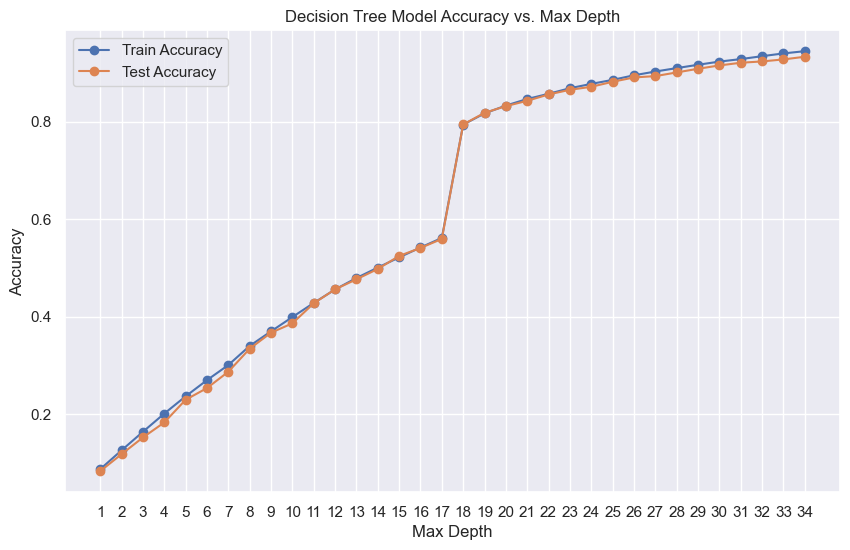

In [75]:
import numpy as np
import matplotlib.pyplot as plt

# Define a range of max_depth values to test
max_depth_values = np.arange(1, 35)

# Initialize empty lists to store accuracy scores
train_accuracy_scores = []
test_accuracy_scores = []

# Iterate over each max_depth value
for max_depth_value in max_depth_values:
    # Train Decision Tree classification model
    dt_model = DecisionTreeClassifier(max_depth=max_depth_value, random_state=42)
    dt_model.fit(X_train, y_train)

    # Predict
    y_pred_train_DT = dt_model.predict(X_train)
    y_pred_test_DT = dt_model.predict(X_test)

    # Calculate accuracy and append to the lists
    train_accuracy = accuracy_score(y_train, y_pred_train_DT)
    test_accuracy = accuracy_score(y_test, y_pred_test_DT)
    train_accuracy_scores.append(train_accuracy)
    test_accuracy_scores.append(test_accuracy)

# Plot the accuracy scores for different values of max_depth
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_accuracy_scores, marker='o', label='Train Accuracy')
plt.plot(max_depth_values, test_accuracy_scores, marker='o', label='Test Accuracy')
plt.title('Decision Tree Model Accuracy vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(max_depth_values)
plt.grid(True)
plt.legend()
plt.show()


## Predict Content Rating

In [76]:
df = cleaned_df_unique

In [77]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

# Preprocessing: Convert category into numerical values using one-hot encoding
df = pd.get_dummies(df, columns=['Category'])
df = pd.get_dummies(df, columns=['Genres'])
df = pd.get_dummies(df, columns=['Content Rating'])

# Separate features and target variable
X = df[[col for col in df.columns if col.startswith('Category_')] + 
       [col for col in df.columns if col.startswith('Genres_')] + 
       ['Rating', 'Reviews']]
y = df[[col for col in df.columns if col.startswith('Content Rating_')]]

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree classification model
dt_model = DecisionTreeClassifier(max_depth=6, random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_pred_train_DT = dt_model.predict(X_train)
y_pred_test_DT = dt_model.predict(X_test)

# Evaluate model
train_accuracy = accuracy_score(y_train, y_pred_train_DT)
test_accuracy = accuracy_score(y_test, y_pred_test_DT)

print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)

# Classification report
print("Classification Report (Testing Set):")
print(classification_report(y_test, y_pred_test_DT))

depth = dt_model.tree_.max_depth
print("Depth of the decision tree:", depth)


Training accuracy: 0.8332478193945613
Testing accuracy: 0.8235294117647058
Classification Report (Testing Set):
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         0
           1       0.87      0.97      0.91      1183
           2       0.00      0.00      0.00        60
           3       0.96      0.45      0.61        60
           4       0.55      0.19      0.28       159
           5       0.00      0.00      0.00         0

   micro avg       0.85      0.82      0.84      1462
   macro avg       0.40      0.27      0.30      1462
weighted avg       0.80      0.82      0.80      1462
 samples avg       0.82      0.82      0.82      1462

Depth of the decision tree: 6


C:\Users\Ivan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ivan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ivan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in samples with no predicted labels. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


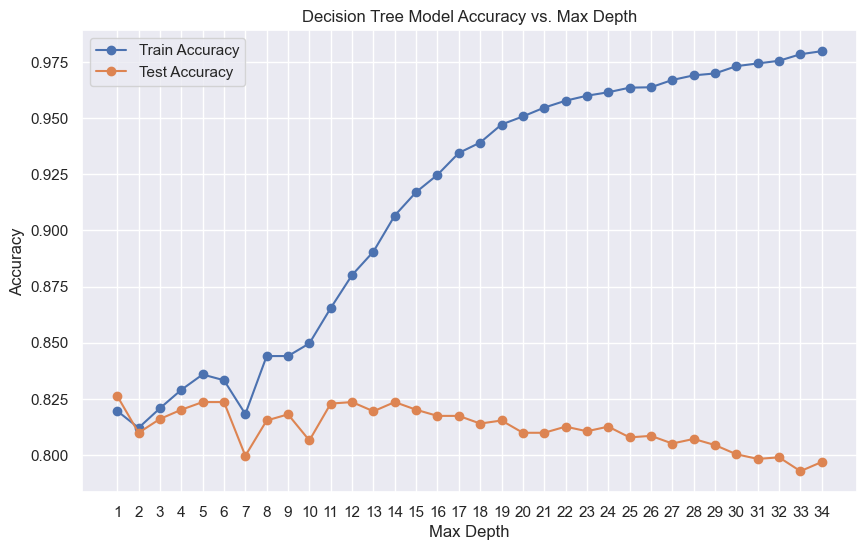

In [78]:
import numpy as np
import matplotlib.pyplot as plt

# Define a range of max_depth values to test
max_depth_values = np.arange(1, 35)

# Initialize empty lists to store accuracy scores
train_accuracy_scores = []
test_accuracy_scores = []

# Iterate over each max_depth value
for max_depth_value in max_depth_values:
    # Train Decision Tree classification model
    dt_model = DecisionTreeClassifier(max_depth=max_depth_value, random_state=42)
    dt_model.fit(X_train, y_train)

    # Predict
    y_pred_train_DT = dt_model.predict(X_train)
    y_pred_test_DT = dt_model.predict(X_test)

    # Calculate accuracy and append to the lists
    train_accuracy = accuracy_score(y_train, y_pred_train_DT)
    test_accuracy = accuracy_score(y_test, y_pred_test_DT)
    train_accuracy_scores.append(train_accuracy)
    test_accuracy_scores.append(test_accuracy)

# Plot the accuracy scores for different values of max_depth
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_accuracy_scores, marker='o', label='Train Accuracy')
plt.plot(max_depth_values, test_accuracy_scores, marker='o', label='Test Accuracy')
plt.title('Decision Tree Model Accuracy vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(max_depth_values)
plt.grid(True)
plt.legend()
plt.show()


## Predicting Installs

In [79]:
df = dff

In [80]:
# Import necessary libraries
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report

In [81]:
# Preprocessing: Convert category into numerical values using one-hot encoding
df = pd.get_dummies(df, columns=['Category'])
df = pd.get_dummies(df, columns=['Genres'])

# Separate features and target variable
X = df[['Reviews', 'Rating'] + [col for col in df.columns if col.startswith('Category_')] + [col for col in df.columns if col.startswith('Genres_')]]
# X = df[['Reviews', 'Rating'] + [col for col in df.columns if col.startswith('Category_')]]
y = df['Installs']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Train Decision Tree classification model
dt_model = DecisionTreeClassifier(max_depth=8, random_state=42)
dt_model.fit(X_train, y_train)

# Predict
y_pred_train_DT = dt_model.predict(X_train)
y_pred_test_DT = dt_model.predict(X_test)

# Evaluate model
train_accuracy = accuracy_score(y_train, y_pred_train_DT)
test_accuracy = accuracy_score(y_test, y_pred_test_DT)

print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)

# Classification report
print("Classification Report (Testing Set):")
print(classification_report(y_test, y_pred_test_DT))

depth = dt_model.tree_.max_depth
print("Depth of the decision tree:", depth)


Training accuracy: 0.8952755905511811
Testing accuracy: 0.8141732283464567
Classification Report (Testing Set):
              precision    recall  f1-score   support

       10000       0.90      0.73      0.81       187
      100000       0.66      0.81      0.73       193
     1000000       0.91      0.87      0.89       255

    accuracy                           0.81       635
   macro avg       0.82      0.81      0.81       635
weighted avg       0.83      0.81      0.82       635

Depth of the decision tree: 8


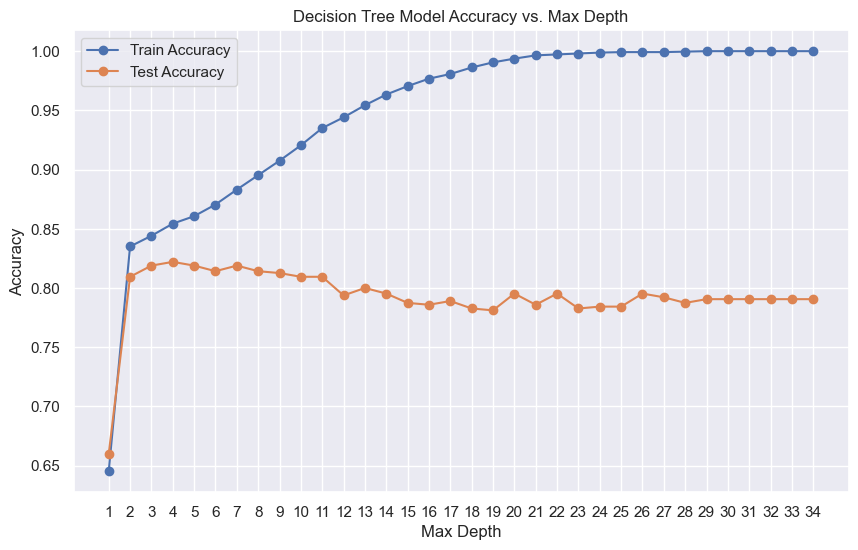

In [82]:
import numpy as np
import matplotlib.pyplot as plt

# Define a range of max_depth values to test
max_depth_values = np.arange(1, 35)

# Initialize empty lists to store accuracy scores
train_accuracy_scores = []
test_accuracy_scores = []

# Iterate over each max_depth value
for max_depth_value in max_depth_values:
    # Train Decision Tree classification model
    dt_model = DecisionTreeClassifier(max_depth=max_depth_value, random_state=42)
    dt_model.fit(X_train, y_train)

    # Predict
    y_pred_train_DT = dt_model.predict(X_train)
    y_pred_test_DT = dt_model.predict(X_test)

    # Calculate accuracy and append to the lists
    train_accuracy = accuracy_score(y_train, y_pred_train_DT)
    test_accuracy = accuracy_score(y_test, y_pred_test_DT)
    train_accuracy_scores.append(train_accuracy)
    test_accuracy_scores.append(test_accuracy)

# Plot the accuracy scores for different values of max_depth
plt.figure(figsize=(10, 6))
plt.plot(max_depth_values, train_accuracy_scores, marker='o', label='Train Accuracy')
plt.plot(max_depth_values, test_accuracy_scores, marker='o', label='Test Accuracy')
plt.title('Decision Tree Model Accuracy vs. Max Depth')
plt.xlabel('Max Depth')
plt.ylabel('Accuracy')
plt.xticks(max_depth_values)
plt.grid(True)
plt.legend()
plt.show()


# 8: XGBoost Model

## Predicting Content Rating

In [492]:
df = cleaned_df_unique

In [493]:
df.dtypes

App                object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int64
Type               object
Price              object
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object

In [494]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

# Preprocessing: Convert category into numerical values using one-hot encoding
df = pd.get_dummies(df, columns=['Category'])
df = pd.get_dummies(df, columns=['Genres'])
df['Content Rating'] = df['Content Rating'].astype('category')  # Convert to categorical type

# Encode Content Rating labels as integers starting from 0
label_mapping = {label: idx for idx, label in enumerate(df['Content Rating'].cat.categories)}
df['Content Rating_encoded'] = df['Content Rating'].cat.codes

# Separate features and target variable
X = df[[col for col in df.columns if col.startswith('Category_')] + 
       [col for col in df.columns if col.startswith('Genres_')] + 
       ['Rating', 'Reviews']]
y = df['Content Rating_encoded']

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling (optional but can improve performance)
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Convert data into DMatrix format (optimized data structure for XGBoost)
dtrain = xgb.DMatrix(X_train_scaled, label=y_train)
dtest = xgb.DMatrix(X_test_scaled, label=y_test)

# Define XGBoost parameters
params = {
    'objective': 'multi:softmax',  # Multiclass classification
    'num_class': len(df['Content Rating'].cat.categories),  # Number of classes
    'eval_metric': 'merror',  # Evaluation metric: multiclass error rate
    'learning_rate': 0.4  # Learning rate
}

# Train XGBoost model
num_rounds = 50  # Number of boosting rounds (trees)
xgb_model = xgb.train(params, dtrain, num_rounds)

# Predict
y_pred_train_XG = xgb_model.predict(dtrain)
y_pred_test_XG = xgb_model.predict(dtest)

# Evaluate model
train_accuracy = accuracy_score(y_train, y_pred_train_XG)
test_accuracy = accuracy_score(y_test, y_pred_test_XG)

print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)

# Classification report
print("Classification Report (Testing Set):")
print(classification_report(y_test, y_pred_test_XG))


Training accuracy: 0.887634684453566
Testing accuracy: 0.8461012311901505
Classification Report (Testing Set):
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00         0
         1.0       0.89      0.97      0.93      1183
         2.0       0.33      0.12      0.17        60
         3.0       0.82      0.47      0.60        60
         4.0       0.48      0.36      0.42       159

    accuracy                           0.85      1462
   macro avg       0.51      0.38      0.42      1462
weighted avg       0.82      0.85      0.83      1462



C:\Users\Ivan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ivan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ivan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


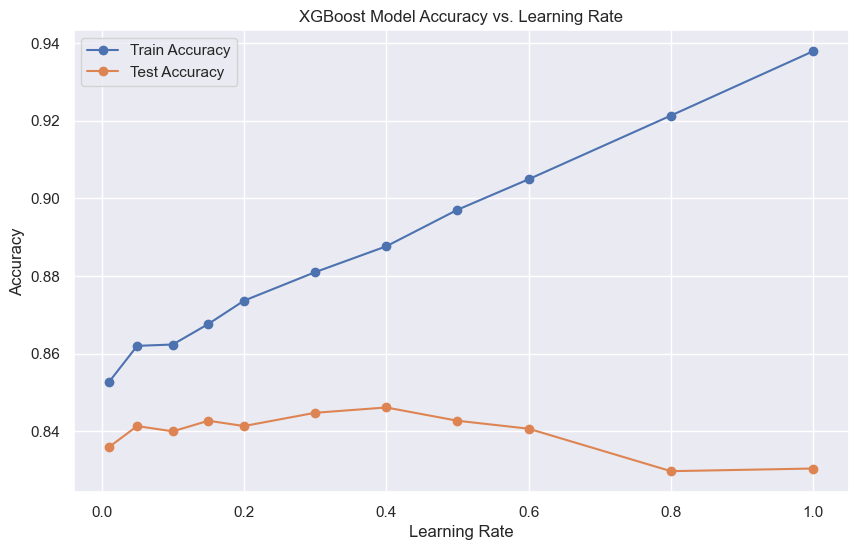

In [495]:
import numpy as np
import matplotlib.pyplot as plt

# Define a range of values for the learning rate parameter
learning_rate_values = [0.01, 0.05, 0.1, 0.15, 0.2, 0.3, 0.4, 0.5, 0.6, 0.8, 1.0]

# Initialize empty lists to store accuracy scores
train_accuracy_scores = []
test_accuracy_scores = []

# Iterate over each value of the learning rate parameter
for learning_rate_value in learning_rate_values:
    # Update the learning rate parameter in the params dictionary
    params['learning_rate'] = learning_rate_value
    
    # Train XGBoost model with the current value of the parameter
    xgb_model = xgb.train(params, dtrain, num_boost_round=num_rounds)
    
    # Predict
    y_pred_train_XG = xgb_model.predict(dtrain)
    y_pred_test_XG = xgb_model.predict(dtest)

    # Calculate accuracy and append to the lists
    train_accuracy = accuracy_score(y_train, y_pred_train_XG)
    test_accuracy = accuracy_score(y_test, y_pred_test_XG)
    train_accuracy_scores.append(train_accuracy)
    test_accuracy_scores.append(test_accuracy)

# Plot the accuracy scores for different values of the learning rate parameter
plt.figure(figsize=(10, 6))
plt.plot(learning_rate_values, train_accuracy_scores, marker='o', label='Train Accuracy')
plt.plot(learning_rate_values, test_accuracy_scores, marker='o', label='Test Accuracy')
plt.title('XGBoost Model Accuracy vs. Learning Rate')
plt.xlabel('Learning Rate')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()


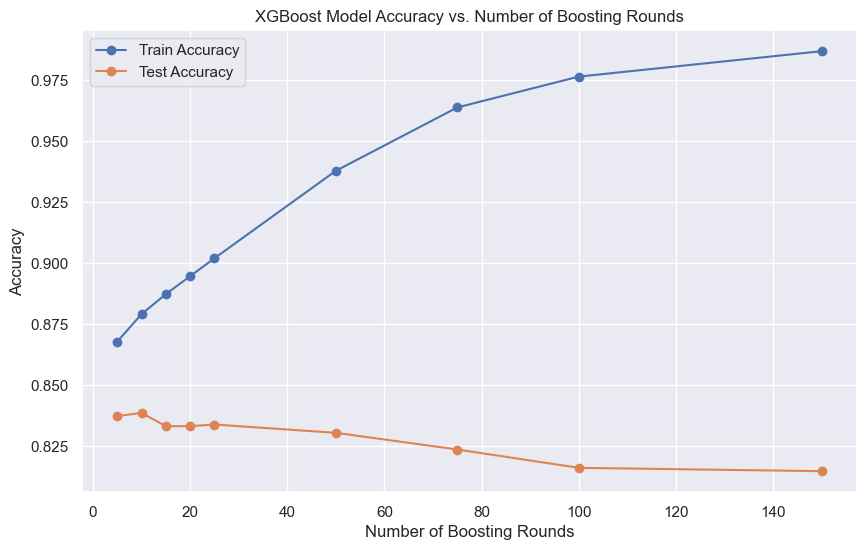

In [496]:
import numpy as np
import matplotlib.pyplot as plt

# Define a range of values for the parameter you want to vary
num_rounds_values = [5, 10, 15, 20, 25, 50, 75, 100, 150]

# Initialize empty lists to store accuracy scores
train_accuracy_scores = []
test_accuracy_scores = []

# Iterate over each value of the parameter
for num_rounds_value in num_rounds_values:
    # Train XGBoost model with the current value of the parameter
    xgb_model = xgb.train(params, dtrain, num_rounds_value)
    
    # Predict
    y_pred_train_XG = xgb_model.predict(dtrain)
    y_pred_test_XG = xgb_model.predict(dtest)

    # Calculate accuracy and append to the lists
    train_accuracy = accuracy_score(y_train, y_pred_train_XG)
    test_accuracy = accuracy_score(y_test, y_pred_test_XG)
    train_accuracy_scores.append(train_accuracy)
    test_accuracy_scores.append(test_accuracy)

# Plot the accuracy scores for different values of the parameter
plt.figure(figsize=(10, 6))
plt.plot(num_rounds_values, train_accuracy_scores, marker='o', label='Train Accuracy')
plt.plot(num_rounds_values, test_accuracy_scores, marker='o', label='Test Accuracy')
plt.title('XGBoost Model Accuracy vs. Number of Boosting Rounds')
plt.xlabel('Number of Boosting Rounds')
plt.ylabel('Accuracy')
plt.grid(True)
plt.legend()
plt.show()


## Predicting Sentiment

In [256]:
app_rating_stats

,App,count,Sentiment,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,10 Best Foods for You,95.0,0.8,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,Free,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
1,11st,40.0,0.4,SHOPPING,3.8,48732,20.0,10000000,Free,0.0,Everyone,Shopping,"July 31, 2018",7.8.1,4.0 and up
2,1800 Contacts - Lens Store,40.0,0.8,MEDICAL,4.7,23160,26.0,1000000,Free,0.0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
3,1LINE – One Line with One Touch,38.0,0.8,GAME,4.6,214878,10.0,10000000,Free,0.0,Everyone,Board,"August 3, 2018",2.0.4,4.1 and up
4,21-Day Meditation Experience,41.0,0.8,HEALTH_AND_FITNESS,4.4,11506,15.0,100000,Free,0.0,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,Horoscopes – Daily Zodiac Horoscope and Astrology,35.0,0.8,LIFESTYLE,4.6,161143,11.0,10000000,Free,0.0,Everyone 10+,Lifestyle,"June 25, 2018",5.2.4(881),4.0.3 and up
669,Horses Live Wallpaper,33.0,0.8,PERSONALIZATION,4.2,28806,7.1,1000000,Free,0.0,Everyone,Personalization,"May 22, 2018",18.0,4.1 and up
670,Hostelworld: Hostels & Cheap Hotels Travel App,38.0,0.8,TRAVEL_AND_LOCAL,4.4,17878,28.0,1000000,Free,0.0,Everyone,Travel & Local,"July 16, 2018",6.7.1,4.1 and up
671,Hotels Combined - Cheap deals,36.0,0.4,TRAVEL_AND_LOCAL,4.1,17202,12.0,5000000,Free,0.0,Everyone,Travel & Local,"November 13, 2017",4.9.2,4.1 and up


In [473]:
df = app_rating_stats

In [474]:
# Convert the "Sentiment" column to object data type
df['Sentiment'] = df['Sentiment'].astype('float')

# Verify the changes
print(df.dtypes)


App                object
count             float64
Sentiment         float64
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [475]:
import math

# Round up all sentiments by 0.2
df['Sentiment'] = df['Sentiment'].apply(lambda x: math.ceil(x / 0.2) * 0.2)

# Verify the changes
df


,App,count,Sentiment,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,10 Best Foods for You,95.0,0.8,HEALTH_AND_FITNESS,4.0,2490,3.8,500000,Free,0.0,Everyone 10+,Health & Fitness,"February 17, 2017",1.9,2.3.3 and up
1,11st,40.0,0.4,SHOPPING,3.8,48732,20.0,10000000,Free,0.0,Everyone,Shopping,"July 31, 2018",7.8.1,4.0 and up
2,1800 Contacts - Lens Store,40.0,0.8,MEDICAL,4.7,23160,26.0,1000000,Free,0.0,Everyone,Medical,"July 27, 2018",7.4.1,5.0 and up
3,1LINE – One Line with One Touch,38.0,0.8,GAME,4.6,214878,10.0,10000000,Free,0.0,Everyone,Board,"August 3, 2018",2.0.4,4.1 and up
4,21-Day Meditation Experience,41.0,0.8,HEALTH_AND_FITNESS,4.4,11506,15.0,100000,Free,0.0,Everyone,Health & Fitness,"August 2, 2018",3.0.0,4.1 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
668,Horoscopes – Daily Zodiac Horoscope and Astrology,35.0,0.8,LIFESTYLE,4.6,161143,11.0,10000000,Free,0.0,Everyone 10+,Lifestyle,"June 25, 2018",5.2.4(881),4.0.3 and up
669,Horses Live Wallpaper,33.0,0.8,PERSONALIZATION,4.2,28806,7.1,1000000,Free,0.0,Everyone,Personalization,"May 22, 2018",18.0,4.1 and up
670,Hostelworld: Hostels & Cheap Hotels Travel App,38.0,0.8,TRAVEL_AND_LOCAL,4.4,17878,28.0,1000000,Free,0.0,Everyone,Travel & Local,"July 16, 2018",6.7.1,4.1 and up
671,Hotels Combined - Cheap deals,36.0,0.4,TRAVEL_AND_LOCAL,4.1,17202,12.0,5000000,Free,0.0,Everyone,Travel & Local,"November 13, 2017",4.9.2,4.1 and up


In [476]:
# Convert the "Sentiment" column to object data type
df['Sentiment'] = df['Sentiment'].astype('object')

# Verify the changes
print(df.dtypes)


App                object
count             float64
Sentiment          object
Category           object
Rating            float64
Reviews             int32
Size              float64
Installs            int64
Type               object
Price             float64
Content Rating     object
Genres             object
Last Updated       object
Current Ver        object
Android Ver        object
dtype: object


In [477]:
print(df['Installs'].unique())

[    500000   10000000    1000000     100000      10000  100000000
    5000000      50000   50000000  500000000       1000 1000000000]


In [478]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score, classification_report
import xgboost as xgb

# Preprocessing: Convert category into numerical values using one-hot encoding
df = pd.get_dummies(df, columns=['Category'])
df = pd.get_dummies(df, columns=['Genres'])

# Encode Installs labels as integers starting from 0
label_mapping = {label: idx for idx, label in enumerate(df['Sentiment'].unique())}
df['Installs_encoded'] = df['Sentiment'].map(label_mapping)

# Separate features and target variable
X = df[['Reviews', 'Rating'] + [col for col in df.columns if col.startswith('Category_')] + [col for col in df.columns if col.startswith('Genres_')]]
y = df['Installs_encoded']

# Define the number of iterations
num_iterations = 2

for iteration in range(num_iterations):
    print(f"Iteration {iteration + 1}/{num_iterations}")

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Feature scaling
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Initialize XGBoost classifier
xgb_classifier = xgb.XGBClassifier(objective='multi:softmax', num_class=len(df['Sentiment'].unique()))

# Define parameter grid for hyperparameter tuning
param_grid = {
    'learning_rate': [0.20],
    'max_depth': [26],
    'min_child_weight': [3],
    'colsample_bytree': [0.8],
    'n_estimators': [16],
}

# Initialize GridSearchCV
grid_search = GridSearchCV(estimator=xgb_classifier, param_grid=param_grid, cv=3, scoring='accuracy', verbose=2, n_jobs=-1)

# Fit GridSearchCV to find the best parameters
grid_search.fit(X_train_scaled, y_train)

# Access the best parameters found
best_params = grid_search.best_params_
best_learning_rate = best_params['learning_rate']
best_max_depth = best_params['max_depth']

# Initialize XGBoost classifier with best parameters
xgb_classifier_best = xgb.XGBClassifier(objective='multi:softmax', num_class=len(df['Sentiment'].unique()), **best_params)

# Train XGBoost model with early stopping
xgb_classifier_best.fit(X_train_scaled, y_train, early_stopping_rounds=10, eval_set=[(X_test_scaled, y_test)], verbose=False)

# Predict
y_pred_train_XG = xgb_classifier_best.predict(X_train_scaled)
y_pred_test_XG = xgb_classifier_best.predict(X_test_scaled)

# Evaluate model
train_accuracy = accuracy_score(y_train, y_pred_train_XG)
test_accuracy = accuracy_score(y_test, y_pred_test_XG)

print("Best learning rate:", best_learning_rate)
print("Best maximum depth:", best_max_depth)
print("Training accuracy:", train_accuracy)
print("Testing accuracy:", test_accuracy)

# Classification report
print("Classification Report (Testing Set):")
print(classification_report(y_test, y_pred_test_XG))


Iteration 1/2
Iteration 2/2
Fitting 3 folds for each of 1 candidates, totalling 3 fits
Best learning rate: 0.2
Best maximum depth: 26
Training accuracy: 0.7639405204460966
Testing accuracy: 0.5407407407407407
Classification Report (Testing Set):
              precision    recall  f1-score   support

           0       0.54      0.86      0.67        57
           1       0.42      0.30      0.35        27
           2       0.71      0.29      0.42        17
           3       0.58      0.50      0.54        14
           4       0.57      0.24      0.33        17
           5       0.00      0.00      0.00         2
           6       0.00      0.00      0.00         1

    accuracy                           0.54       135
   macro avg       0.40      0.31      0.33       135
weighted avg       0.54      0.54      0.50       135



C:\Users\Ivan\anaconda3\lib\site-packages\xgboost\sklearn.py:889: UserWarning: `early_stopping_rounds` in `fit` method is deprecated for better compatibility with scikit-learn, use `early_stopping_rounds` in constructor or`set_params` instead.
  warnings.warn(
C:\Users\Ivan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ivan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\Ivan\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1344: UndefinedMetricWarning: Prec

# Comparitive Study to see Model Performances

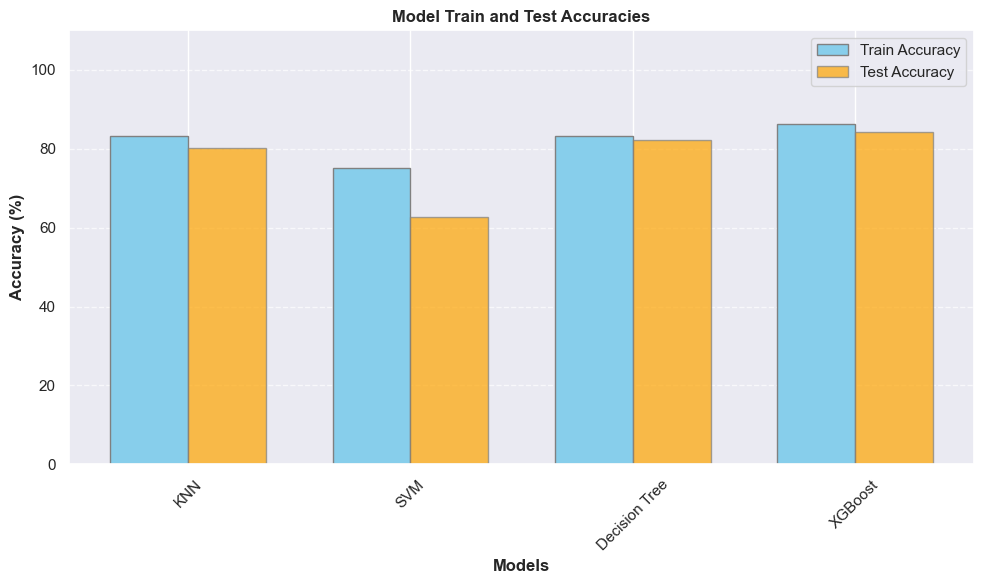

In [491]:
import numpy as np
import matplotlib.pyplot as plt


models = ['KNN', 'SVM', 'Decision Tree', 'XGBoost']
train_accuracies = [83.3, 75.2, 83.3, 86.2]
test_accuracies = [80.3, 62.75, 82.3, 84.13]


bar_width = 0.35


r1 = np.arange(len(models))
r2 = [x + bar_width for x in r1]


plt.figure(figsize=(10, 6))
plt.bar(r1, train_accuracies, color='skyblue', width=bar_width, edgecolor='grey', label='Train Accuracy')
plt.bar(r2, test_accuracies, color='orange', width=bar_width, edgecolor='grey', alpha=0.7, label='Test Accuracy')

plt.xlabel('Models', fontweight='bold')
plt.ylabel('Accuracy (%)', fontweight='bold')
plt.title('Model Train and Test Accuracies', fontweight='bold')
plt.xticks([r + bar_width/2 for r in range(len(models))], models, rotation=45)
plt.ylim(0, 110)  # Set y-axis limits to ensure all accuracies are visible
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.7)


plt.tight_layout()
plt.show()
